# Anisotropía en objetos compactos

## Resolver ecuaciones de campo de Einstein para un objeto estático, simétricamente esférico y anisótropo

### Conociendo $\Delta = P_{\perp} - P$ y $\rho = \rho(r)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp

In [2]:
plt.rcParams.update({'text.latex.preamble' : r'\usepackage{amssymb}'})
plt.rcParams.update({'text.usetex': True,'font.serif': 'sans-serif'})
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["savefig.bbox"] = 'tight'

In [3]:
c = 2.997*10**(8)          # Velocidad de la luz en unidades S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en unidades S.I.
Msol = 1.989*10**(30)      # 1 Masa solar en kilogramos

## Ecuaciones de estructura: 

\begin{align}
    \frac{\mathrm{d}P}{\mathrm{d}r} &= -\frac{G m\rho}{r^{2}} \left(1 + \frac{P}{\rho c^{2}}\right)\left(1 + \frac{4\pi r^{3}P}{m c^{2}}\right)\left(1 - \frac{2Gm}{rc^{2}}\right)^{-1} + \frac{2\left(P_{\perp}-P\right)}{r} \\
    &= -G\frac{\left[\rho + \left(P/c^{2}\right)\right]\left[m + \left(4\pi r^{3}P/c^{2}\right)\right]}{r\left[r - \left(2mG/c^{2}\right)\right]} + \frac{2\left(P_{\perp}-P\right)}{r} \qquad \text{y} \\
    \frac{\mathrm{d}m}{\mathrm{d}r} &= 4\pi r^{2}\rho\,.
\end{align}

### En sistema de unidades geométricas ($c=G=1$) se tiene

\begin{align}
    \frac{\mathrm{d}P}{\mathrm{d}r} &= -\frac{m\rho}{r^{2}} \left(1 + \frac{P}{\rho}\right)\left(1 + \frac{4\pi r^{3}P}{m}\right)\left(1 - \frac{2m}{r}\right)^{-1} + \frac{2\left(P_{\perp}-P\right)}{r} \\
    &= -\frac{\left(\rho + P\right)\left(m + 4\pi r^{3}P\right)}{r\left(r - 2m\right)} + \frac{2\left(P_{\perp}-P\right)}{r} \qquad \text{y} \\
    \frac{\mathrm{d}m}{\mathrm{d}r} &= 4\pi r^{2}\rho\,.
\end{align}

Se adimensionaliza las ecuaciones de estructura proponiendo:

\begin{align*}
    m = R\tilde{m}\,, \quad P = \frac{1}{R^{2}}\tilde{P}\,, \quad P_{\perp} = \frac{1}{R^{2}}\tilde{P}_{\perp}\,, \quad \rho = \frac{1}{R^{2}}\tilde{\rho}\,, \quad r = R x\,.
\end{align*}


Por lo tanto, las ecuaciones ahora son

\begin{align*}
    \frac{\mathrm{d}\tilde{P}}{\mathrm{d}x} &= -\frac{\left(\tilde{\rho} + \tilde{P}\right)\left(\tilde{m} + 4\pi\tilde{P}x^{3}\right)}{x\left(x-2\tilde{m}\right)} + \frac{2\left(\tilde{P}_{\perp} - \tilde{P}\right)}{x}  \qquad \text{y} \\
    \frac{\mathrm{d}\tilde{m}}{\mathrm{d}x} &= 4\pi\tilde{\rho}x^{2} \,.
\end{align*}

Por otra parte, la anisotropía (Herrera) es
\begin{equation}
    \Delta = - \frac{1}{2 r^{3}} \int_{0}^{r} \tilde{r}^{3} \rho^{\prime} \mathrm{d}\tilde{r} = \frac{\rho_{c}\alpha r^{2}}{5 R^{2}}\,.
\end{equation}

Adimensionalizando se tiene
\begin{equation}
    \tilde{\Delta} = \frac{\tilde{\rho}_{c}\alpha x^{2}}{5}\,.
\end{equation}

Ahora, introducimos el perfil de densidad
\begin{align*}
    \tilde{\rho} = \tilde{\rho}_{c}\left(1-\alpha x^{2}\right)\,,
\end{align*}
por lo que la masa es
\begin{align*}
    \tilde{m} = 4\pi\tilde{\rho}_{c}\left(\frac{x^{3}}{3} - \alpha\frac{x^{5}}{5}\right)
\end{align*}
y puede ser reemplazada en la ecuación de equilibrio hidrostático.

In [4]:
# Ecuación de equilibrio hidrostático a resolver
def EcEqHid(x,P_,rho_c_til,varkappa,C):
    return -(rho_tilde(x,rho_c_til,varkappa) + P_)*(m_tilde(x,rho_c_til,varkappa) + 4*np.pi*x**(3)*P_)/x/(x - 2*m_tilde(x,rho_c_til,varkappa)) + 2*Delta_tilde(x,rho_c_til,varkappa,C)/x

La densidad adimensional en el centro es
\begin{equation}
    \tilde{\rho}\left(x=0\right) = \tilde{\rho}_{c}\,,
\end{equation}
mientras que en el borde es
\begin{equation}
    \tilde{\rho}\left(x=x_{b}\right) = \tilde{\rho}_{c}\left(1-\alpha\right) = \tilde{\rho}_{b}\,\,;\, x_{b} = 1\,.
\end{equation}
De lo anterior podemos escribir el perfil de densidad como
\begin{equation}
    \tilde{\rho} = \tilde{\rho}_{c}\left[1-\left(1-\varkappa\right)x^{2}\right]\,;\,\, \varkappa = \frac{\rho_{b}}{\rho_{c}} \,.
\end{equation}

In [5]:
# Función densidad
def rho_tilde(x,rho_c_til,varkappa):
    return rho_c_til*(1-(1-varkappa)*x**2)

# Función masa
def m_tilde(x,rho_c_til,varkappa):
    return 4*np.pi*rho_c_til*((x**3/3)-(1-varkappa)*(x**5/5))

# Anisotropía Herrera
def Delta_tilde(x,rho_c_til,varkappa,C):
    return C*rho_c_til*(1-varkappa)*(x**2)/5

Dando $R$, el valor en metros del radio total, se tiene que
\begin{align}
    \rho_{s} &= \frac{c^{2}}{GR^{2}} \,\,\Rightarrow\,\, \tilde{\rho}_{c} = \frac{GR^{2}}{c^{2}}\rho_{c}\,, \\
    P_{s} &= \frac{c^{4}}{GR^{2}} = \rho_{s}c^{2}\,, \\
    m_{s} &= \frac{Rc^{2}}{G}\,.
\end{align}

Dando $M_{\odot}$, el valor de la masa total en unidades de masa solar, se tiene que
\begin{align}
    R = \frac{M_{\odot}M_{sol}}{\tilde{M}}\frac{G}{c^{2}} \quad \Rightarrow \quad R = \left\{\frac{M_{\odot}M_{sol}}{4\pi\rho_{c}\left[\frac{1}{3}-\left(1-\varkappa\right)\frac{1}{5}\right]}\right\}^{1/3}\,,
\end{align}
donde $M_{sol}$ es la masa del sol en kilogramos. 

In [6]:
Lista_C = np.linspace(0.16,0.31,6)
print('Valores de C: ',end='')
Lista_C = [0.05,0.15,0.25,0.35,0.45,0.0]
print(*Lista_C, sep=', ')

Lista_rho_c = np.round(np.linspace(0.1,2.5,9),2)
Lista_rho_c = [i*10**18 for i in Lista_rho_c]
print('Valores de \u03c1_c: ',end='')
print(*Lista_rho_c, sep=', ')

Lista_varkappa = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
print('Valores de \u03f0: ',end='')
print(*Lista_varkappa, sep=', ')

# Número total de modelos evaluados
Numero_de_modelos = len(Lista_C)*len(Lista_rho_c)*len(Lista_varkappa)
print('\nNúmero de modelos: ', Numero_de_modelos)

Valores de C: 0.05, 0.15, 0.25, 0.35, 0.45, 0.0
Valores de ρ_c: 1e+17, 4e+17, 7e+17, 1e+18, 1.3e+18, 1.6e+18, 1.9e+18, 2.2000000000000003e+18, 2.5e+18
Valores de ϰ: 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9

Número de modelos:  540


In [7]:
%%time

Z = []

for i in range(len(Lista_C)):
    
    Z.append([])
    
    C = Lista_C[i]
    
    for j in range(len(Lista_rho_c)):
                
        rho_c = Lista_rho_c[j]
        
        for k in range(len(Lista_varkappa)):
            
            CondsCumps = 9
            
            varkappa = Lista_varkappa[k]
    
            M_odot = 2.08                     # Masa total en unidades de masa solar
            R = (M_odot*Msol/4/np.pi/rho_c/(1/3 - (1-varkappa)/5))**(1/3) 
            rho_c_til = G*R**2*rho_c/c**2 
            
    
            P0 = 0                 # Condición inicial para Ecuación de equilibrio hidrostático
        
            xmin = 10**-15   
            xmax = 1
            x_span = (xmax,xmin)   # Integración desde el borde (x=1) hacia el centro (x=0)
        
            soluciones = solve_ivp(EcEqHid,x_span,[P0],args=[rho_c_til,varkappa,C],method='RK45',max_step=1/50)
        
            P_til = soluciones.y[0]                                      # Presión radial adimensional
            x = soluciones.t                                             # Radio adimensional
            m_til = m_tilde(x,rho_c_til,varkappa)                        # Masa adimensional
            rho_til = rho_tilde(x,rho_c_til,varkappa)                    # Densidad de energía adimensional
            Delta_til = Delta_tilde(x,rho_c_til,varkappa,C)              # Anisotropía adimensional
            Pt_til = Delta_til + P_til                                   # Presión tangencial adimensional
            gradrho_til = np.gradient(rho_til,x)                         # Derivada de la densidad de energía adimensional
            gradP_til = np.gradient(P_til,x)                             # Derivada de la presión radial adimensional
            gradPt_til = np.gradient(Pt_til,x)                           # Derivada de la presión tangencial adimensional
            vs2 = gradP_til/gradrho_til                                  # Velocidad del sonido radial al cuadrado
            vst2 = gradPt_til/gradrho_til                                # Velocidad del sonido tangencial al cuadrado
            gradgradrho_til = np.gradient(gradrho_til,x)                 # Derivada segunda de la densidad de energía adimensional
            gradvs2 = np.gradient(vs2,x)                                 # Derivada de la velocidad del sonido radial al cuadrado
            var_rho_c = np.linspace(0.5*10**18,2.5*10**18,11)    
            var_rho_c_til = G*R**2*var_rho_c/c**2    
            var_M_til = 4*np.pi*var_rho_c_til*(1/3 - (1-varkappa)/5)     # M tilde en función de rho central tilde
        
            var_til = [rho_til,P_til,m_til]
        
            ## Condición 1
            C1 = 2*m_til/x
            if any(C1 >= 1): CondsCumps = CondsCumps - 1
            else: pass
        
            ## Condición 2
            C2A = rho_til
            C2B = P_til
            C2C = Pt_til
            C2 = [C2A,C2B,C2C]
            if any(C2[0] < 0) or any(C2[1] < 0) or any(C2[2] < 0): CondsCumps = CondsCumps - 1
            else: pass
        
            ## Condición 3
            C3A = gradrho_til
            C3B = gradP_til
            C3C = gradPt_til
            C3 = [C3A,C3B,C3C]
            if any(C3[0] > 0) or any (C3[1] > 0) or any (C3[2] > 0): CondsCumps = CondsCumps - 1
            else: pass
        
            ## Condición 4
            C4 = rho_til - P_til - 2*Pt_til
            if any(C4 < 0): CondsCumps = CondsCumps - 1
            else: pass
        
            ## Condición 5
            C5A = vs2             
            C5B = vst2   
            C5 = [C5A,C5B]
            if any(C5[0] > 1) or any(C5[1] > 1): CondsCumps = CondsCumps - 1
            else: pass
        
            ## Condición 6
            C6 = ((rho_til[1:] + P_til[1:])*vs2[1:]/P_til[1:])
            if any(C6 < 4/3): CondsCumps = CondsCumps - 1
            else: pass
        
            ## Condición 7
            C7 = var_M_til
        
            ## Condición 8
            C8rho = (m_til + 4*np.pi*x**3*P_til)/x/(x - 2*m_til)
            C8P = ((m_til + 4*np.pi*x**3*(rho_til + 2*P_til))/x/(x - 2*m_til) + 2/x)*vs2
            C8Pt = -(2/x)*vst2
            C8m = ((rho_til + P_til)*(1 + 8*np.pi*x**2*P_til)/(x - 2*m_til)**2)*(4*np.pi*x**2*rho_til/gradrho_til)
            C8dP = gradvs2 + vs2*gradgradrho_til/gradrho_til
            C8T = C8rho+C8P+C8Pt+C8m+C8dP
        
            C8 = [C8T,C8rho,C8P,C8Pt,C8m,C8dP]
            if any(np.diff(np.sign(C8[0][2:-1])) != 0): CondsCumps = CondsCumps - 1
            else: pass
        
            ## Condición 9
            C9 = gradgradrho_til
            
            Z[i].append(int(CondsCumps))
            
    Z[i] = np.flipud(np.array(Z[i]).reshape(len(Lista_rho_c),len(Lista_varkappa)).T)
    

Wall time: 6.73 s


In [8]:
ZHerrera = Z[:-1].copy()
%store ZHerrera

Stored 'ZHerrera' (list)


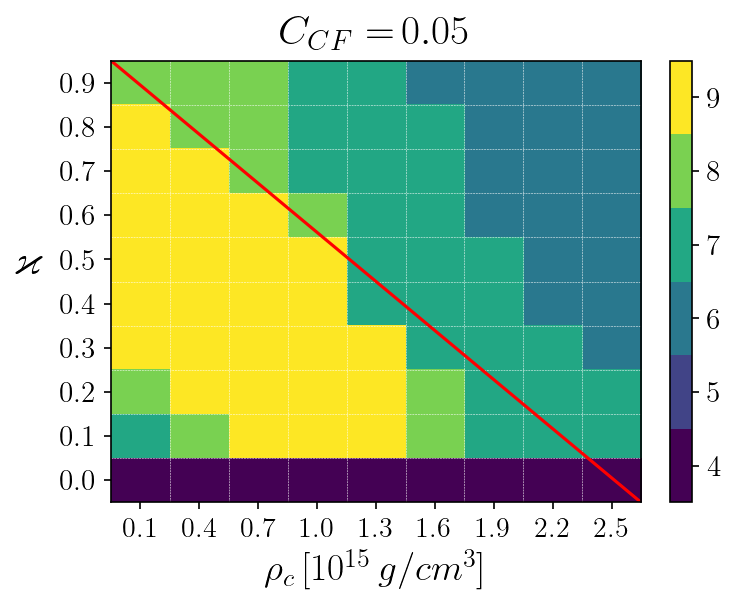

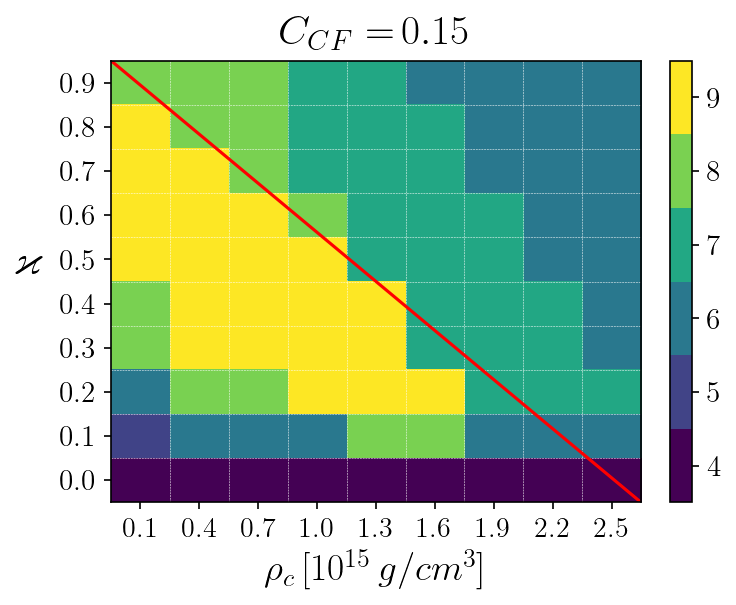

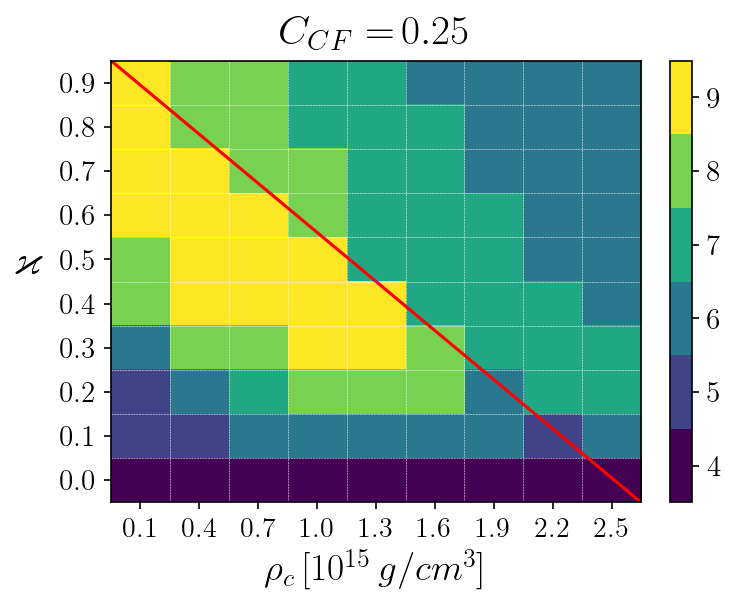

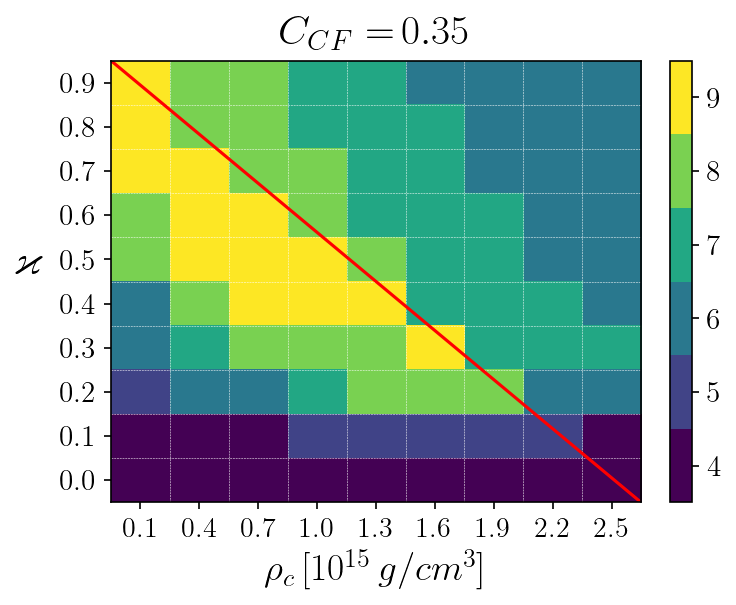

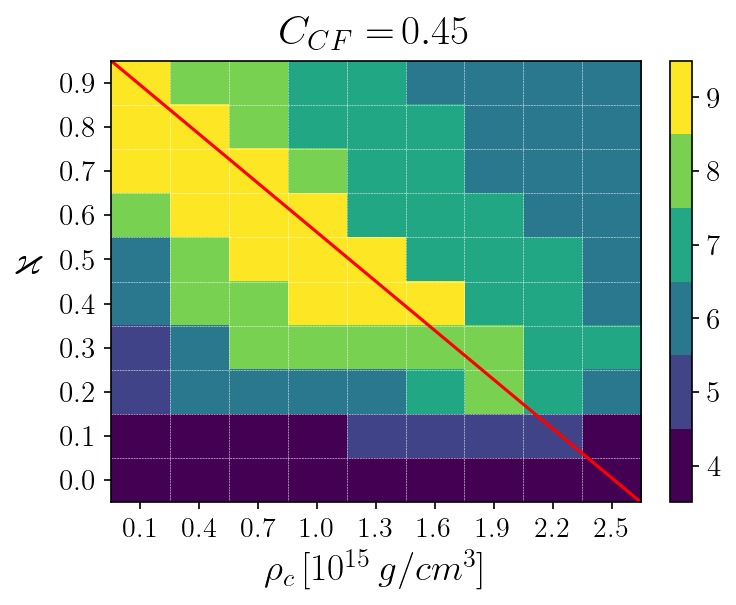

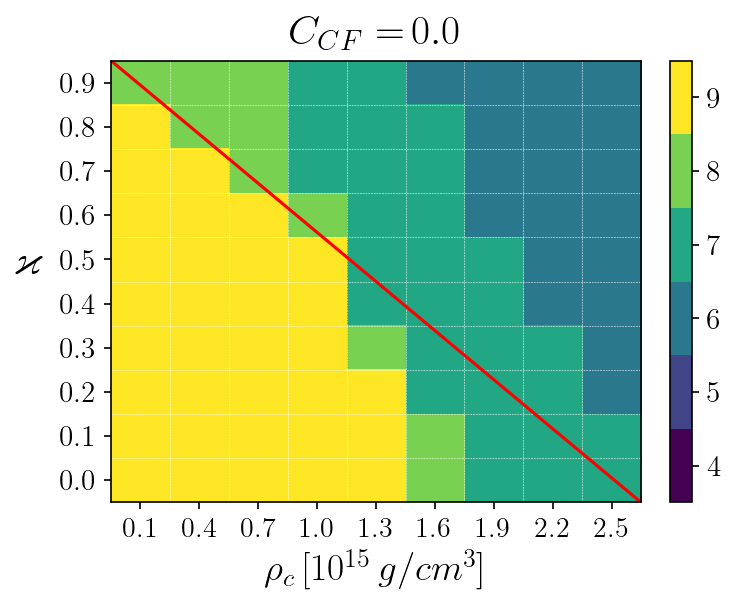

In [9]:
for i in range(len(Lista_C)):
    
    zim = Z[i]
    
    fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5,8))
    
    im = plt.imshow(zim,aspect=2.25,vmin=4,vmax=9,cmap='viridis',extent=[-0.05,2.65,-0.05,0.95])

    ax1.set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=18)
    ax1.set_ylabel(r'$\varkappa$',fontsize=20,rotation=0,labelpad=15)
    ax1.set_title(r'$C_{CF}=\,$'fr'${Lista_C[i]}$',fontsize=20,x=0.5,y=1.01)
    #plt.suptitle(r'Número de condiciones cumplidas',fontsize=15,x=0.5,y=0.75)
    
    cb = plt.colorbar(spacing='proportional',format='%1i',fraction=0.038,orientation="vertical",
                    ticks=[4,5,6,7,8,9],boundaries=[3.5,4.5,5.5,6.5,7.5,8.5,9.5])
    cb.ax.set_yticklabels([r'$4$',r'$5$',r'$6$',r'$7$',r'$8$',r'$9$'],fontsize=14)
    
    ax1.set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
    ax1.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) 
    ax1.set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
    ax1.set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True) 
    ax1.grid(which='minor',color='w',linestyle='dashed',linewidth=0.25)
    ax1.tick_params(which='minor',bottom=False,left=False)
    
    ax1.axline((-0.05,0.95),(2.65,-0.05),color='r')
    
    plt.xticks(fontsize=13.5),plt.yticks(fontsize=14)
    plt.show()
    

C:\Users\marce\AppData\Local\Temp/ipykernel_6112/3003058101.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


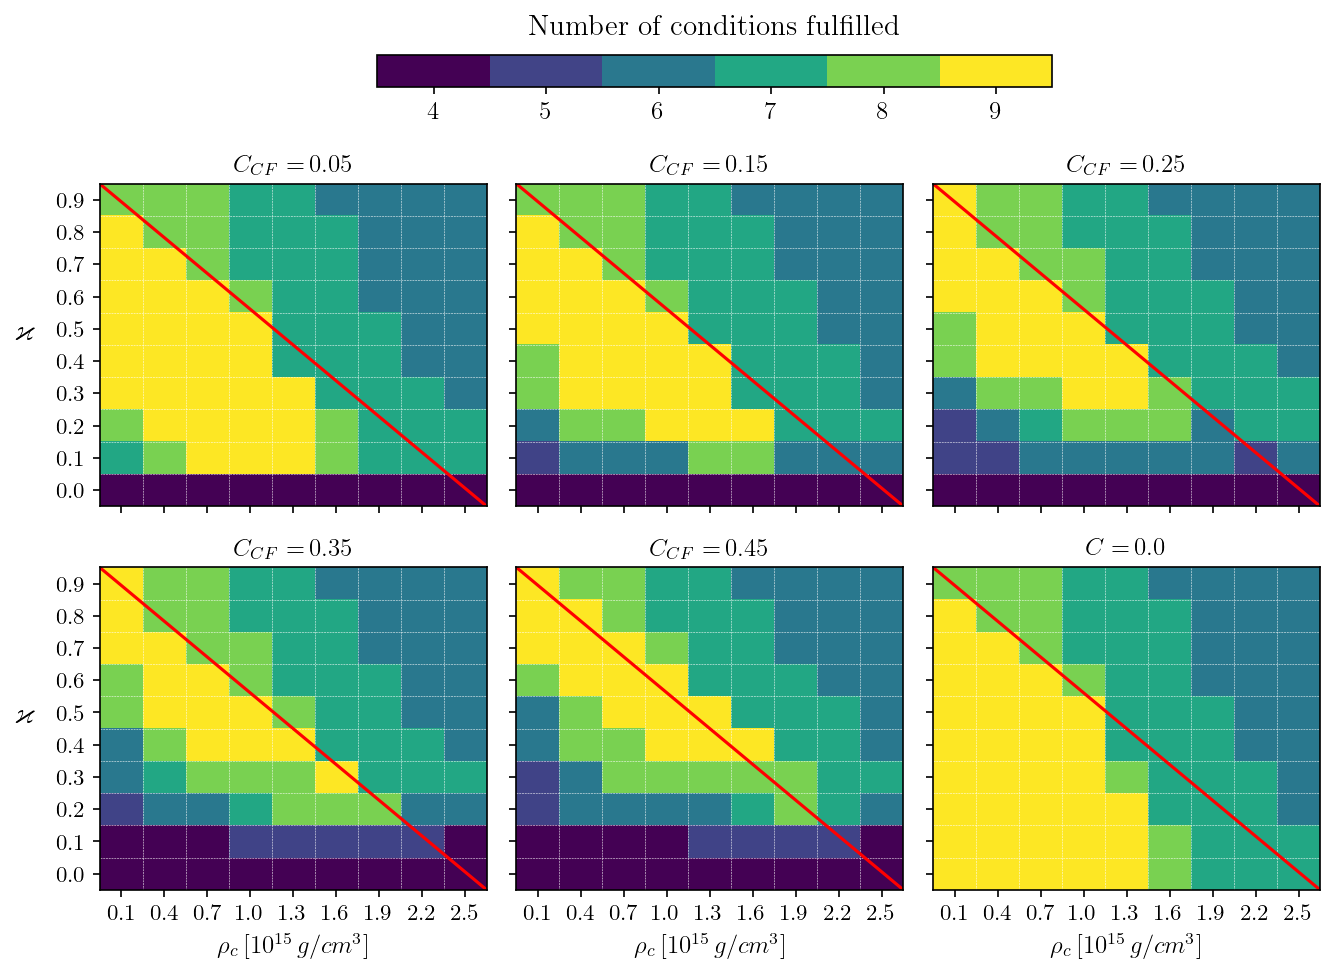

In [10]:
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True,sharex=True,figsize=(9,6))

axs[0,0].imshow(Z[0],aspect=2.25,vmin=4,vmax=9,cmap='viridis',extent=[-0.05,2.65,-0.05,0.95])
axs[0,1].imshow(Z[1],aspect=2.25,vmin=4,vmax=9,cmap='viridis',extent=[-0.05,2.65,-0.05,0.95])
axs[0,2].imshow(Z[2],aspect=2.25,vmin=4,vmax=9,cmap='viridis',extent=[-0.05,2.65,-0.05,0.95])
axs[1,0].imshow(Z[3],aspect=2.25,vmin=4,vmax=9,cmap='viridis',extent=[-0.05,2.65,-0.05,0.95])
axs[1,1].imshow(Z[4],aspect=2.25,vmin=4,vmax=9,cmap='viridis',extent=[-0.05,2.65,-0.05,0.95])
axs[1,2].imshow(Z[5],aspect=2.25,vmin=4,vmax=9,cmap='viridis',extent=[-0.05,2.65,-0.05,0.95])

#axs[0,0].set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=12)
axs[0,0].set_ylabel(r'$\varkappa$',fontsize=14,rotation=0,labelpad=15)
axs[0,0].set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
axs[0,0].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])   
axs[0,0].set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
axs[0,0].set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True)
axs[0,0].grid(which='minor',color='w',linestyle='dashed',linewidth=0.25)
axs[0,0].tick_params(which='minor',bottom=False,left=False)
axs[0,0].axline((-0.05,0.95),(2.65,-0.05),color='r')

#axs[0,1].set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=12)
#axs[0,1].set_ylabel(r'$\varkappa$',fontsize=14,rotation=0,labelpad=15)
axs[0,1].set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
axs[0,1].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])   
axs[0,1].set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
axs[0,1].set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True)
axs[0,1].grid(which='minor',color='w',linestyle='dashed',linewidth=0.25)
axs[0,1].tick_params(which='minor',bottom=False,left=False)
axs[0,1].axline((-0.05,0.95),(2.65,-0.05),color='r')

#axs[0,1].set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=12)
#axs[0,2].set_ylabel(r'$\varkappa$',fontsize=14,rotation=0,labelpad=15)
axs[0,2].set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
axs[0,2].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])   
axs[0,2].set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
axs[0,2].set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True)
axs[0,2].grid(which='minor',color='w',linestyle='dashed',linewidth=0.25)
axs[0,2].tick_params(which='minor',bottom=False,left=False)
axs[0,2].axline((-0.05,0.95),(2.65,-0.05),color='r')

axs[1,0].set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=12)
axs[1,0].set_ylabel(r'$\varkappa$',fontsize=14,rotation=0,labelpad=15)
axs[1,0].set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
axs[1,0].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])   
axs[1,0].set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
axs[1,0].set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True)
axs[1,0].grid(which='minor',color='w',linestyle='dashed',linewidth=0.25)
axs[1,0].tick_params(which='minor',bottom=False,left=False)
axs[1,0].axline((-0.05,0.95),(2.65,-0.05),color='r')

axs[1,1].set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=12)
#axs[1,1].set_ylabel(r'$\varkappa$',fontsize=14,rotation=0,labelpad=15)
axs[1,1].set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
axs[1,1].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])   
axs[1,1].set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
axs[1,1].set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True)
axs[1,1].grid(which='minor',color='w',linestyle='dashed',linewidth=0.25)
axs[1,1].tick_params(which='minor',bottom=False,left=False)
axs[1,1].axline((-0.05,0.95),(2.65,-0.05),color='r')

axs[1,2].set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=12)
#axs[1,2].set_ylabel(r'$\varkappa$',fontsize=14,rotation=0,labelpad=15)
axs[1,2].set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
axs[1,2].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])   
axs[1,2].set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
axs[1,2].set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True)
axs[1,2].grid(which='minor',color='w',linestyle='dashed',linewidth=0.25)
axs[1,2].tick_params(which='minor',bottom=False,left=False)
axs[1,2].axline((-0.05,0.95),(2.65,-0.05),color='r')


axs[0,0].set_title(r'$C_{CF}=\,$' fr'${Lista_C[0]}$',fontsize=12)
axs[0,1].set_title(r'$C_{CF}=\,$' fr'${Lista_C[1]}$',fontsize=12)
axs[0,2].set_title(r'$C_{CF}=\,$' fr'${Lista_C[2]}$',fontsize=12)
axs[1,0].set_title(r'$C_{CF}=\,$' fr'${Lista_C[3]}$',fontsize=12)
axs[1,1].set_title(r'$C_{CF}=\,$' fr'${Lista_C[4]}$',fontsize=12)
axs[1,2].set_title(r'$C=\,$' fr'${Lista_C[5]}$',fontsize=12)

plt.suptitle(r'$\textrm{Number of conditions fulfilled}$',fontsize=14,x=0.535,y=1.075)
#plt.suptitle(r'Número de condiciones cumplidas',fontsize=15,x=0.535,y=1.075)
cbar_ax = fig.add_axes([0.285,0.995,0.5, 0.035])
cb = fig.colorbar(axs[0,0].imshow(Z[0],aspect=2.25,vmin=4,vmax=9,cmap='viridis',extent=[-0.05,2.65,-0.05,0.95]),
                  spacing='proportional',orientation="horizontal",
                  ticks=[4,5,6,7,8,9],boundaries=[3.5,4.5,5.5,6.5,7.5,8.5,9.5],cax=cbar_ax)
cb.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()